In [9]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

import random
import numpy as np
seed=1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

train_images = train_images / 255.0
test_images = test_images / 255.0


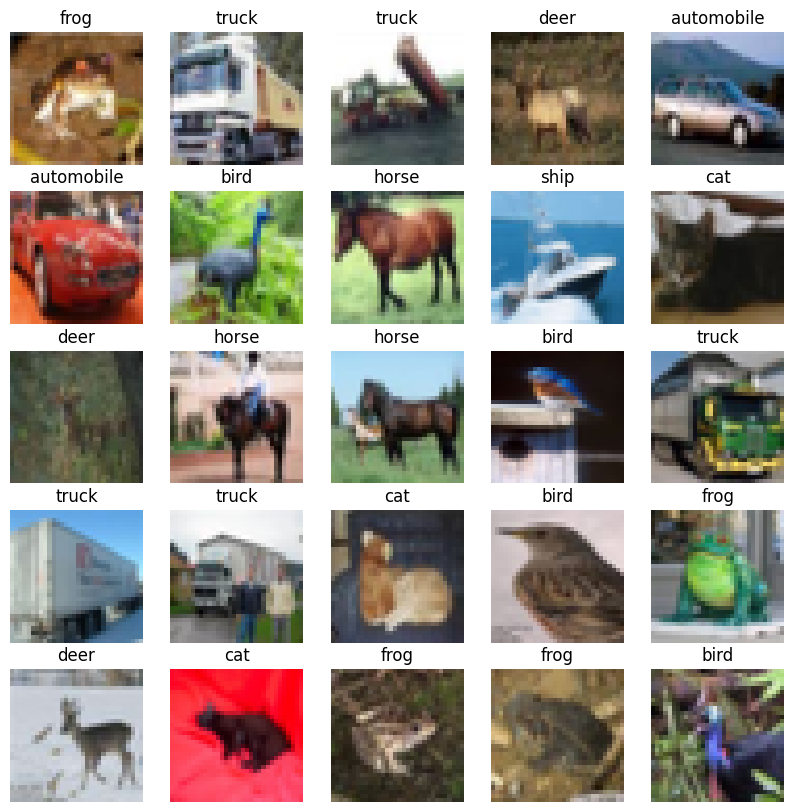

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()


In [12]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]
print(dim)


3072


In [13]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()


Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1800)        

In [14]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
 44/157 [=======>......................] - ETA: 7s - loss: 2.2763 - accuracy: 0.1271

KeyboardInterrupt: 

In [15]:
print(train_images.shape)
print(test_images.shape)

(5000, 32, 32, 3)
(10000, 32, 32, 3)


In [16]:
### 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:10000]
y_test = y_test[:10000]

x_train = x_train/255
x_test = x_test/255

y_train2 = y_train.ravel()
y_test2 = y_test.ravel()

# Define our model
# extra parameter called n_estimators which is number of trees in the forest
# a leaf is a class label at the end of the decision tree
forest = RandomForestClassifier() 

# train our model
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

forest.fit(x_train2, y_train2)
forest_preds = forest.predict(x_test2)

acc_forest = accuracy_score(y_test2, forest_preds)
print("RF acc: ", acc_forest)

Forest acc:  0.3945


<Axes: >

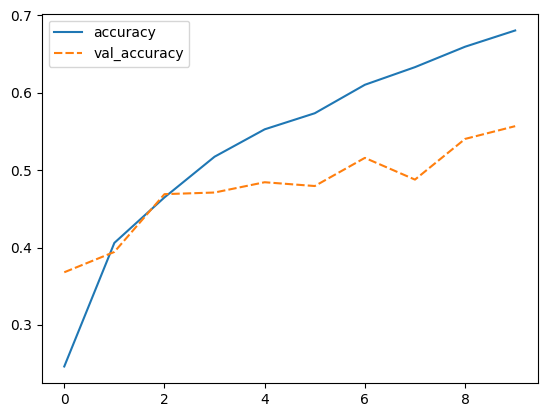

In [ ]:
import seaborn as sns
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])


<Axes: >

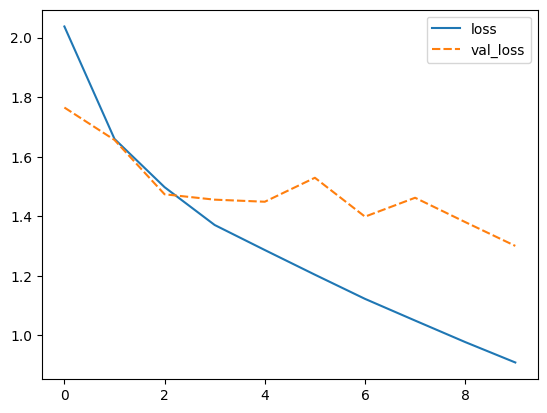

In [ ]:
sns.lineplot(data=history_df[['loss', 'val_loss']])


In [ ]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Dropout(0.8)(x) # This is new!
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)

model_dropout = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")

model_dropout.summary()


Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 50)          

In [ ]:
model_dropout.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_dropout = model_dropout.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))


Epoch 1/2
157/157 [==============================] - 9s 53ms/step - loss: 1.8421 - accuracy: 0.2978 - val_loss: 1.7639 - val_accuracy: 0.3477
Epoch 2/2
157/157 [==============================] - 9s 56ms/step - loss: 1.7445 - accuracy: 0.3362 - val_loss: 1.6396 - val_accuracy: 0.3921


313/313 - 3s - loss: 1.6396 - accuracy: 0.3921 - 3s/epoch - 8ms/step


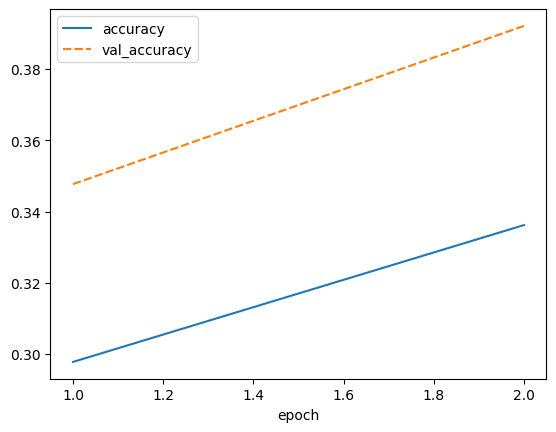

In [ ]:
history_df = pd.DataFrame.from_dict(history_dropout.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

test_loss, test_acc = model_dropout.evaluate(test_images,  test_labels, verbose=2)


<Axes: xlabel='epoch'>

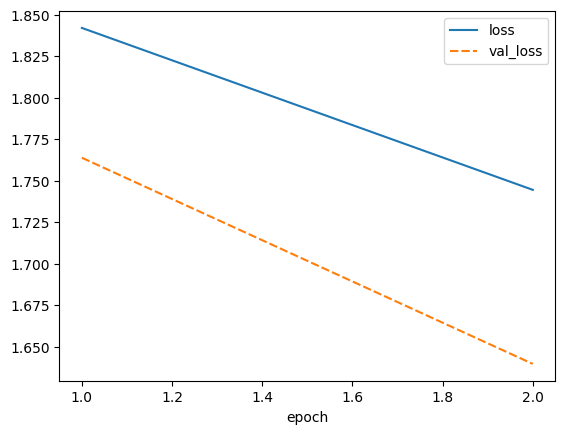

In [ ]:
sns.lineplot(data=history_df[['loss', 'val_loss']])
